# A bacteria-specific machine learning study of individual antimicrobial peptide activity against A. baumannii


## Developers : Hamid Teimouri and Angela Medvedeva

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
import pingouin as pg
import matplotlib.patches as mpatches

#print(sklearn.__version__)
import import_ipynb
from amp_ml_functions import *
from scipy.stats import ks_2samp

from statsmodels.stats.weightstats import ztest as ztest

1.21.5
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


importing Jupyter notebook from amp_ml_functions.ipynb
1.21.5
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


## peptides targeting bacteria A. baumannii

In [2]:

df=pd.read_csv("Abaumannii_AMP.csv", )

df

,peptide,sequence,MIC,MIC_0
0,Tachyplesin-1 [G10A],KWCFRVCYRAICYRRCR,0.060,1
1,Tachyplesin-1 [K1A],AWCFRVCYRGICYRRCR,0.125,1
2,Tachyplesin-1 [R5A],KWCFAVCYRGICYRRCR,0.125,1
3,Tachyplesin-1 [R9A],KWCFRVCYAGICYRRCR,0.125,1
4,Tachyplesin-1 [R14A],KWCFRVCYRGICYARCR,0.125,1
...,...,...,...,...
117,Phormicin B,MKFCAVFAFIFVAVCCFAGQATALPAEEANFVHGVDALKTLEPEVH...,512.000,0
118,"Human Defensin-5, HD5 [C3,5,20,30,31A]",ATAYARTGRCATRESLSGVAEISGRLYRLCAR,1280.000,0
119,"Human Defensin-5, HD5 [C3,10,30,31A]",ATAYCRTGRAATRESLSGVCEISGRLYRLAAR,1280.000,0
120,"Human Defensin-5, HD5 [C3,5,10,20,30,31A]",ATAYARTGRAATRESLSGVAEISGRLYRLAAR,2560.000,0


### number of nonAMP peptides


In [3]:
df[df['MIC_0']==0].shape

(35, 4)

### number of AMP peptides

In [4]:
df[df['MIC_0']==1].shape

(87, 4)

### uploading propy features

In [5]:
df=pd.read_csv("Abaumannii_AMP_all_descriptors.csv")
df1=df.drop(columns=['Unnamed: 0','AMP_Name'])

df1

,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,MIC,MIC_0
0,6,5.882,29.412,0.000,0.000,23.529,0.000,0.000,0.000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060,1
1,5,5.882,29.412,0.000,0.000,23.529,0.000,0.000,5.882,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,1
2,5,5.882,23.529,0.000,0.000,23.529,0.000,0.000,5.882,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,1
3,5,5.882,23.529,0.000,0.000,23.529,0.000,0.000,5.882,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,1
4,5,5.882,23.529,0.000,0.000,23.529,0.000,0.000,5.882,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,8,17.582,6.593,4.396,2.198,9.890,4.396,1.099,6.593,4.396,...,0.030154,0.030303,0.031741,0.028707,0.033357,0.026361,0.027522,0.032581,512.000,0
109,4,18.750,18.750,0.000,0.000,6.250,6.250,0.000,9.375,0.000,...,0.015177,0.021804,0.016424,0.008142,0.012286,0.005865,0.005160,0.004795,1280.000,0
110,4,18.750,18.750,0.000,0.000,6.250,6.250,0.000,9.375,0.000,...,0.015142,0.021553,0.016416,0.008754,0.012219,0.005836,0.005094,0.004792,1280.000,0
111,4,25.000,18.750,0.000,0.000,0.000,6.250,0.000,9.375,0.000,...,0.015108,0.021858,0.016317,0.008673,0.012191,0.005823,0.005082,0.004781,2560.000,0


## Feature Selection Method 1: Lasso Regression

In [6]:
df0 = df1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df0)
scaled_features_df = pd.DataFrame(df_normalized, index=df0.index, columns=df0.columns)
scaled_features_df


,net_charge,A,R,N,D,C,E,Q,G,H,...,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,MIC,MIC_0
0,0.411765,0.176462,0.823543,0.00000,0.000000,0.94116,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.352941,0.176462,0.823543,0.00000,0.000000,0.94116,0.000000,0.000000,0.274488,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000025,1.0
2,0.352941,0.176462,0.658817,0.00000,0.000000,0.94116,0.000000,0.000000,0.274488,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000025,1.0
3,0.352941,0.176462,0.658817,0.00000,0.000000,0.94116,0.000000,0.000000,0.274488,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000025,1.0
4,0.352941,0.176462,0.658817,0.00000,0.000000,0.94116,0.000000,0.000000,0.274488,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000025,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.529412,0.527465,0.184605,0.42494,0.241778,0.39560,0.542181,0.104408,0.307667,0.150718,...,0.861592,1.000000,0.990204,1.000000,1.000000,0.898038,0.924736,1.000000,0.199981,0.0
109,0.294118,0.562506,0.525004,0.00000,0.000000,0.25000,0.770844,0.000000,0.437491,0.000000,...,0.433653,0.719533,0.512369,0.283624,0.368318,0.199802,0.173375,0.147172,0.499988,0.0
110,0.294118,0.562506,0.525004,0.00000,0.000000,0.25000,0.770844,0.000000,0.437491,0.000000,...,0.432653,0.711250,0.512120,0.304943,0.366310,0.198814,0.171158,0.147080,0.499988,0.0
111,0.294118,0.750008,0.525004,0.00000,0.000000,0.00000,0.770844,0.000000,0.437491,0.000000,...,0.431682,0.721315,0.509031,0.302121,0.365471,0.198372,0.170755,0.146742,1.000000,0.0


In [7]:
X = np.array(scaled_features_df)
y = np.array(df1['MIC_0'])
klist = np.array(scaled_features_df.columns)

In [8]:
data_dict = {}
bacterium_file_name = "Abaumannii_AMP_all_descriptors.csv"
bacterium_name = 'ABau'
data_dict = bacterium_load(bacterium_file_name,data_dict,bacterium_name)

In [9]:
data_dict

{'ABau': [     net_charge         A         R         N         D         C         E  \
  0      0.176232  0.167969  1.815816 -0.243958 -0.243958  1.403819 -0.243958   
  1      0.107218  0.169694  1.836439 -0.246956 -0.246956  1.419717 -0.246956   
  2      0.099510  0.158545  1.339707 -0.235154 -0.235154  1.339707 -0.235154   
  3      0.094267  0.152236  1.312069 -0.234353 -0.234353  1.312069 -0.234353   
  4      0.097015  0.157155  1.360414 -0.243909 -0.243909  1.360414 -0.243909   
  ..          ...       ...       ...       ...       ...       ...       ...   
  108    0.178819  0.782871  0.090121 -0.048378 -0.186941  0.297965 -0.048378   
  109   -0.000447  0.948129  0.948129 -0.257688 -0.257688  0.144251  0.144251   
  110    0.002577  0.963624  0.963624 -0.258047 -0.258047  0.149177  0.149177   
  111   -0.001095  1.351468  0.948920 -0.258726 -0.258726 -0.258726  0.143822   
  112    0.001266  0.958830  0.958830 -0.258412 -0.258412  0.147335  0.147335   
  
              Q  

In [10]:
XX=data_dict['ABau'][0]
yy=data_dict['ABau'][1]
klist = data_dict['ABau'][2]

In [11]:
X=np.array(XX)
y=np.array(yy)

In [12]:
#function for svm feature selection via bagging
#function for lasso feature selection
#function for cross validation

In [13]:
#for each bacterium:
#id the max accuracy for lasso & linear svm, and get the params and features
#all features, lasso features, svm features accuracy for each model

In [14]:
#AA = lasso_grid_search(X,y)
lambdaa=0.01

In [15]:
ns = 5
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [16]:
def lasso_feature_selection1(Xtrain_cv,Ytrain_cv,CC,ns,klist):
    from sklearn.linear_model import Lasso
    import numpy as np
    listlocs = list(range(ns))
    results = list(range(ns))
    kfeatures = list(range(ns))
    kweights = list(range(ns))

    bagging_dict = {}
    model = Lasso(alpha = CC)
    for i in range(ns):
    
        X_train = Xtrain_cv[i]
        Y_train = Ytrain_cv[i]

        model.fit(X_train, Y_train)
        #print(i)
        #print(model.coef_)
        T = model.coef_
        #print(i)
        #print(T)
        TT = list(T)
        locs = np.where(abs(T) > 0)
        listlocs[i] = np.asarray(locs)

        if i == 0:
            flistlocs = listlocs[i]
            flistlocs=flistlocs[0]
        else:
            flistlocs = np.intersect1d(flistlocs,listlocs[i])
        

        for f in flistlocs:
            f_feature = klist[f]
            f_weight = T[f]
        
            if i == 0:
                bagging_dict[f_feature] = []
                bagging_dict[f_feature].append(f_weight)
            else:
                bagging_dict[f_feature].append(f_weight)

        kfeatures[i] = klist[listlocs[i]]
        kweights[i] = T[listlocs[i]]
        
    kfeatures=klist[flistlocs]
    featuredict={}
    for k,v in bagging_dict.items():
        if k in kfeatures:
            print(k, sum(v)/len(v))
            featuredict[k]=sum(v)/len(v)
    return featuredict

In [17]:
featuredict_lasso = lasso_feature_selection1(Xtrain_cv,Ytrain_cv,lambdaa,ns,klist)
featuredict_lasso

_SecondaryStrD1100 -0.11731350316416234
_SecondaryStrD2075 0.025587461020783298
_SecondaryStrD3025 0.043373872704279545
_ChargeD1075 0.08953065539779816
_ChargeD3100 -0.04505093596058761
_NormalizedVDWVD2025 -0.06178008306827322
_NormalizedVDWVD2100 -0.058454734829336864
_NormalizedVDWVD3100 0.04049649048361429
APAAC16 -0.1854229547919471
PAAC35 0.019393166505120775
PAAC39 0.019541368979406323


{'_SecondaryStrD1100': -0.11731350316416234,
 '_SecondaryStrD2075': 0.025587461020783298,
 '_SecondaryStrD3025': 0.043373872704279545,
 '_ChargeD1075': 0.08953065539779816,
 '_ChargeD3100': -0.04505093596058761,
 '_NormalizedVDWVD2025': -0.06178008306827322,
 '_NormalizedVDWVD2100': -0.058454734829336864,
 '_NormalizedVDWVD3100': 0.04049649048361429,
 'APAAC16': -0.1854229547919471,
 'PAAC35': 0.019393166505120775,
 'PAAC39': 0.019541368979406323}

In [18]:
def svm_feature_plot2(featuredict,fig_title,fonts):

    featuredict = sorted(featuredict.items(), key=lambda x:x[1])
    feature_name=[]
    feature_coef=[]

    for items in featuredict:
        #print(items[0], items[1])
        feature_name.append(items[0])
        feature_coef.append(items[1])
    xx=feature_name
    yy=feature_coef
    # Plot of feature importance
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()

    #plt.figure(figsize=(7, 7))
    dr=0.05
    plt.barh(xx, yy, color='g')
    #ax.set_xticks(np.arange(-max(yy),max(yy),0.1))
    #ax.set_xticks(np.arange(-np.round(max(yy),2),np.round(max(yy),2)+dr,dr))

    plt.grid(False)

    plt.xlabel("Feature Importance",  fontsize=fonts)
    plt.figtext(0.45,0.94,'(a)',size=20)
    plt.tick_params(labelsize=18)
    plt.savefig(fig_title, bbox_inches = 'tight',
        pad_inches = 0)
    plt.show()

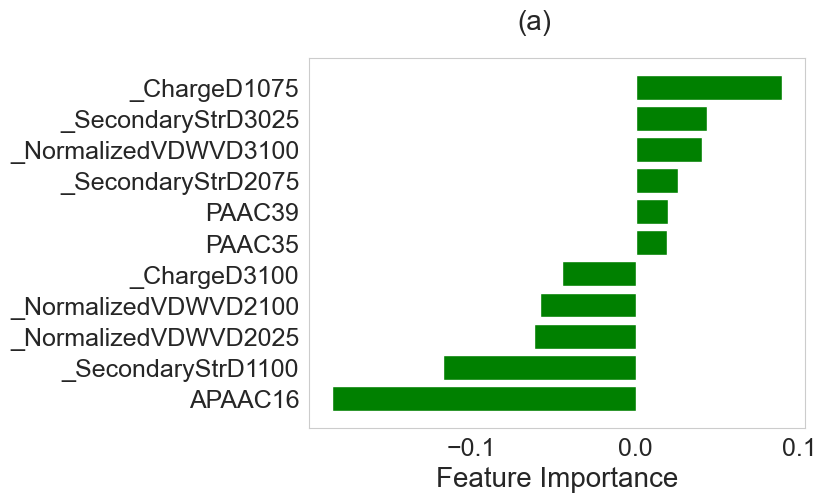

In [19]:
featuredict=featuredict_lasso
fonts=20
fig_title = "ABau_Feature_Importance_lasso.pdf"
svm_feature_plot2(featuredict,fig_title, fonts)

## Feature Selection Method 2: Support Vector Machine

In [20]:
ns = 5
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [21]:
CC = linear_SVM_grid_search(X,y,ns)
CC

/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/p

0.1

In [22]:
featuredict_svm = svm_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist)
featuredict_svm

_PolarizabilityD3100 0.06574940296231638
_SecondaryStrD3025 0.11273741768002925
_SecondaryStrD3100 -0.14745724132131371
_ChargeD1075 0.08145864372361658
_ChargeD3100 -0.0784955890908506
_NormalizedVDWVD2025 -0.12256687952222282
_NormalizedVDWVD3100 0.06891058390172364
PAAC35 0.0803251400485315


{'_PolarizabilityD3100': 0.06574940296231638,
 '_SecondaryStrD3025': 0.11273741768002925,
 '_SecondaryStrD3100': -0.14745724132131371,
 '_ChargeD1075': 0.08145864372361658,
 '_ChargeD3100': -0.0784955890908506,
 '_NormalizedVDWVD2025': -0.12256687952222282,
 '_NormalizedVDWVD3100': 0.06891058390172364,
 'PAAC35': 0.0803251400485315}

In [23]:
def svm_feature_plot2(featuredict,fig_title,fonts):

    featuredict = sorted(featuredict.items(), key=lambda x:x[1])
    feature_name=[]
    feature_coef=[]

    for items in featuredict:
        #print(items[0], items[1])
        feature_name.append(items[0])
        feature_coef.append(items[1])
    xx=feature_name
    yy=feature_coef
    # Plot of feature importance
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig, ax = plt.subplots()

    #plt.figure(figsize=(7, 7))
    dr=0.05
    plt.barh(xx, yy, color='orange')
    #ax.set_xticks(np.arange(-max(yy),max(yy),0.1))
    #ax.set_xticks(np.arange(-np.round(max(yy),2),np.round(max(yy),2)+dr,dr))

    plt.grid(False)

    plt.xlabel("Feature Importance",  fontsize=fonts)
    plt.figtext(0.45,0.94,'(b)',size=20)
    plt.tick_params(labelsize=18)
    plt.savefig(fig_title, bbox_inches = 'tight',
        pad_inches = 0)
    plt.show()

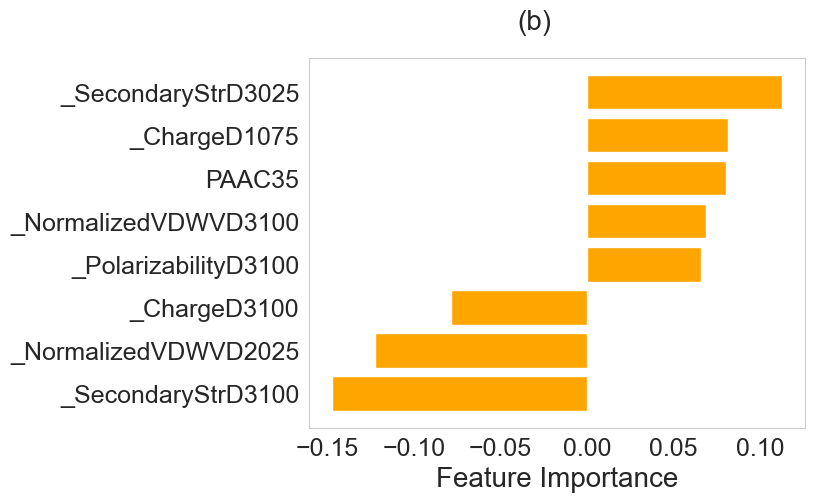

In [24]:
featuredict=featuredict_svm
fig_title = "ABau_Feature_Importance_SVM.pdf"
svm_feature_plot2(featuredict,fig_title,20)

In [25]:
svc_model,confusion,class_report,y_predict = svm_function(X,y)

              precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.71      0.94      0.81        16

    accuracy                           0.70        23
   macro avg       0.61      0.54      0.52        23
weighted avg       0.65      0.70      0.63        23



## Here we consider all 1500 features for the three ML models

In [26]:
log_array,svm_array = models_crossval(Xtrain_cv,Ytrain_cv,ns)

/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

average logistic regression accuracy:1.0
average SVM accuracy:0.7777777777777778
average logistic regression recall:1.0
average SVM recall:0.6176682692307692
average logistic regression matthews_corrcoef:1.0
average SVM matthews_corrcoef:0.41108312214669185


## Here we use features from SVM

In [27]:
cols=list(featuredict_svm.keys())
X=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(X, yy):
    Xtrain_cv[i] = X[train_index]
    Xtest_cv[i] = X[test_index]
    Ytrain_cv[i] = yy[train_index]
    Ytest_cv[i] = yy[test_index]
    i+=1
    #print(i)

In [28]:
log_array,svc_array = models_crossval(Xtrain_cv,Ytrain_cv,ns)

average logistic regression accuracy:0.7888888888888889
average SVM accuracy:0.8666666666666666
average logistic regression recall:0.6780048076923078
average SVM recall:0.8194711538461539
average logistic regression matthews_corrcoef:0.4332730548878826
average SVM matthews_corrcoef:0.6674231365245497


## Here we use features from Lasso method

In [29]:

cols=list(featuredict_lasso.keys())
X=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(X, yy):
    Xtrain_cv[i] = X[train_index]
    Xtest_cv[i] = X[test_index]
    Ytrain_cv[i] = yy[train_index]
    Ytest_cv[i] = yy[test_index]
    i+=1
    #print(i)

In [30]:
log_array,svc_array = models_crossval(Xtrain_cv,Ytrain_cv,ns)

average logistic regression accuracy:0.828888888888889
average SVM accuracy:0.9
average logistic regression recall:0.7198317307692308
average SVM recall:0.8337740384615385
average logistic regression matthews_corrcoef:0.5565754358568521
average SVM matthews_corrcoef:0.7508996674095748


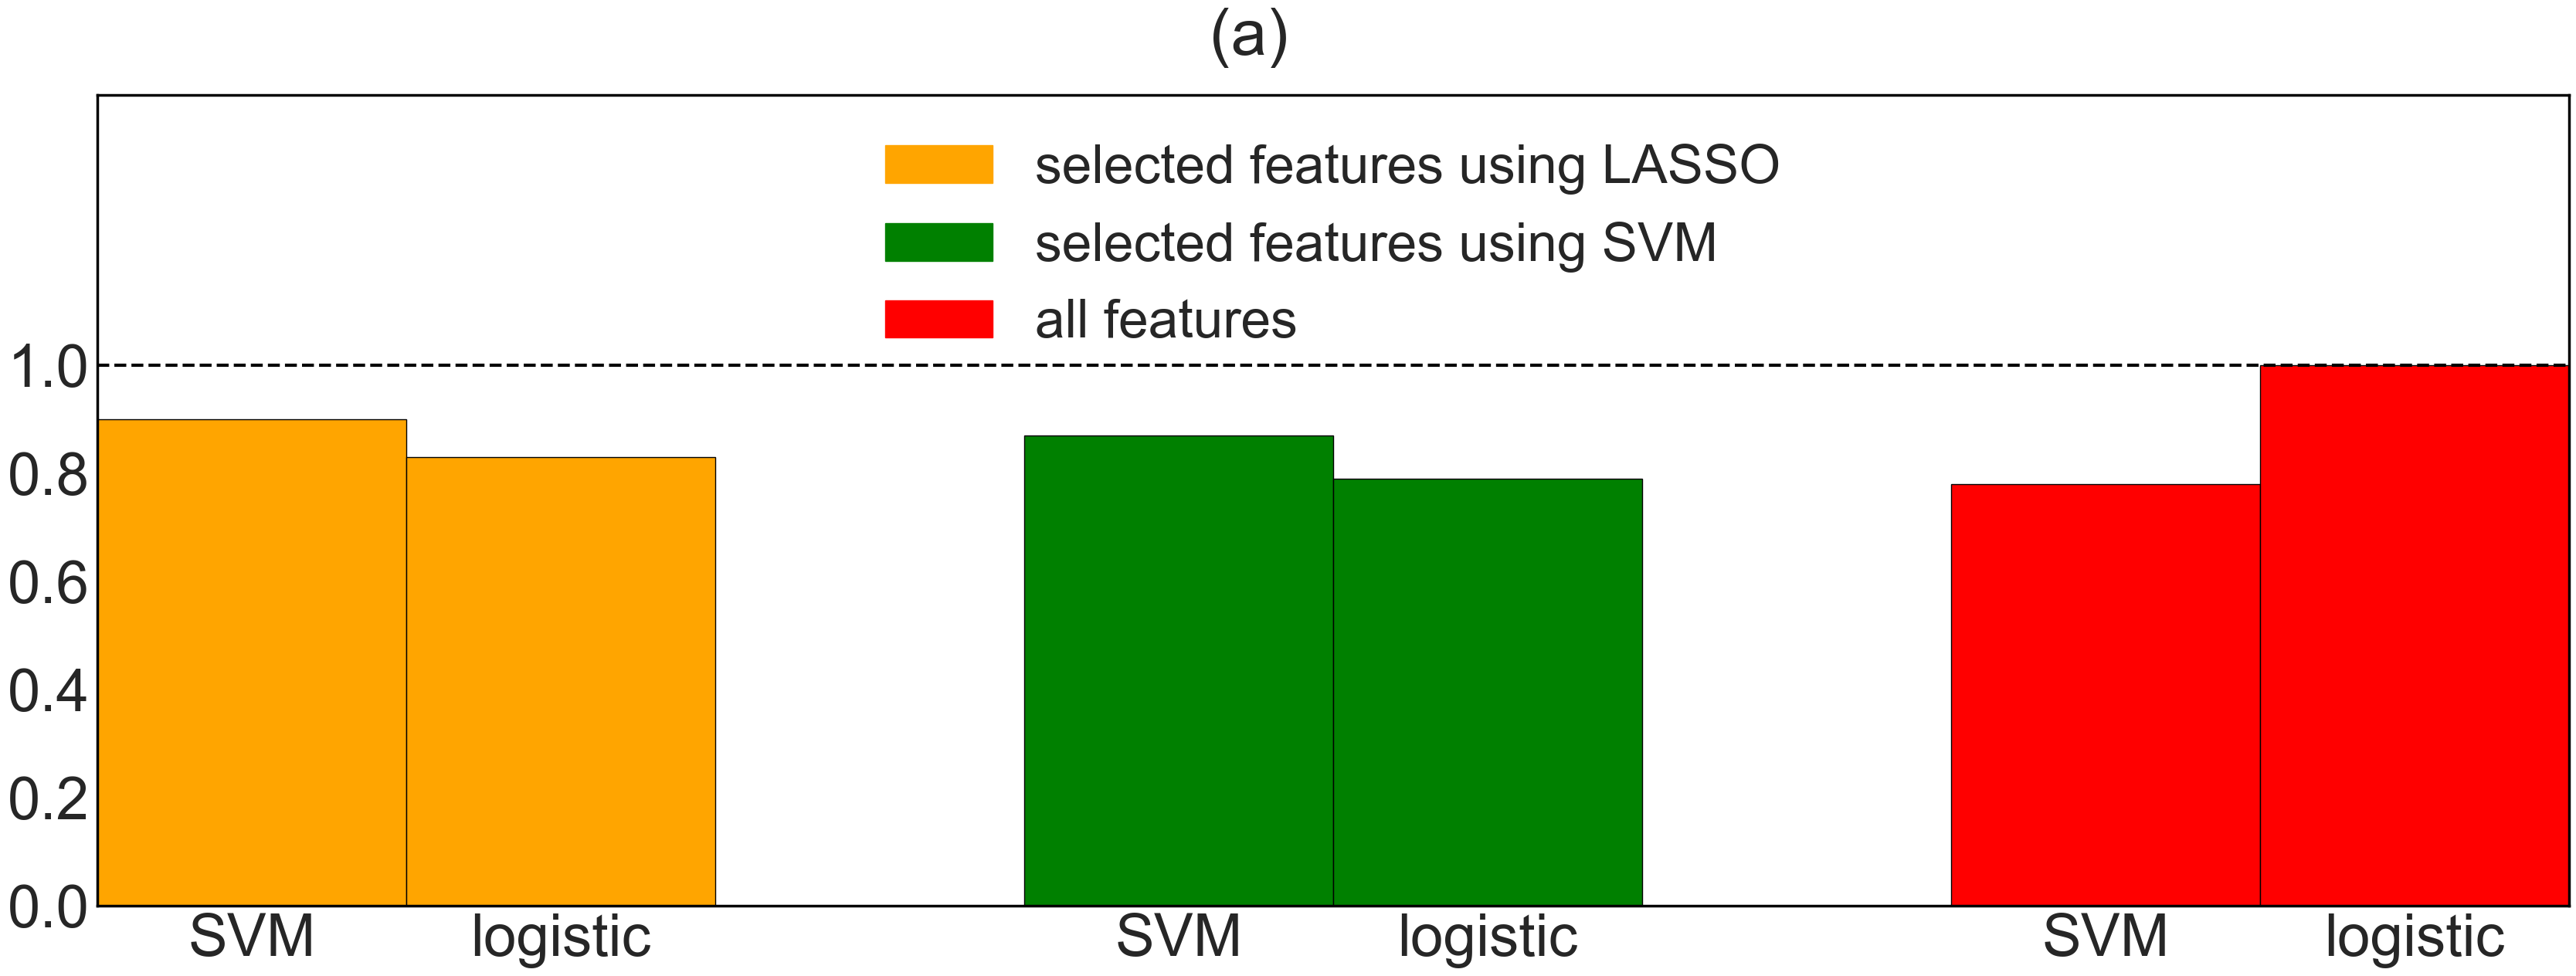

In [31]:

fig = plt.gcf()
fig.set_size_inches(32, 10.5)

#lasso: average logistic regression accuracy:0.7454258675078863
#average SVM accuracy:0.7268138801261829

#SVM
#average logistic regression accuracy:0.7189274447949526
#average SVM accuracy:0.731230283911672

#all
#[0]logistic regression accuracy: 0.9526813880126183
#[1]SVM accuracy: 0.7823343848580442

Ydata = [0.9,0.83]
Ydata2 = [0.87,0.79]
Ydata3 = [0.78,1]

#br1 = np.array([1,2])
#br2 = np.array([5,6])
#br3 = np.array([9,10])

br1 = np.array([0.5,1])
br2 = np.array([2,2.5])
br3 = np.array([3.5,4])

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

#barWidth = 1
barWidth = 0.5

plt.bar(br1, Ydata, width = barWidth, edgecolor = 'black', color = 'orange')
plt.yticks(fontsize=45)
plt.bar(br2, Ydata2, width = barWidth, edgecolor = 'black', color = 'green')
plt.bar(br3, Ydata3, width = barWidth, edgecolor = 'black', color = 'red')

#plt.xticks([1,2,5,6,9,10],
#        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 45)
plt.xticks([0.5,1,2,2.5,3.5,4],
        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 55)
plt.yticks([0,0.2,0.4,0.6,0.8,1],fontsize=55)

plt.xlim([0.25,4.25])
plt.ylim([0,1.5])
plt.hlines(y=1,xmin=0.25,xmax=4.25,color='black',linewidth=3,linestyle='dashed')
plt.grid(False)


#plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.figtext(0.45,1.05,'(a)',size=60)

Blue0 = mpatches.Patch(color='orange', label='selected features using LASSO')
Green0 = mpatches.Patch(color='green', label='selected features using SVM')
Red0 = mpatches.Patch(color='red', label='all features')
plt.legend(handles=[Blue0,Green0,Red0], loc='upper center', frameon=False, fontsize = 50)

plt.savefig("AB_bar_plot_accuracy.pdf", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

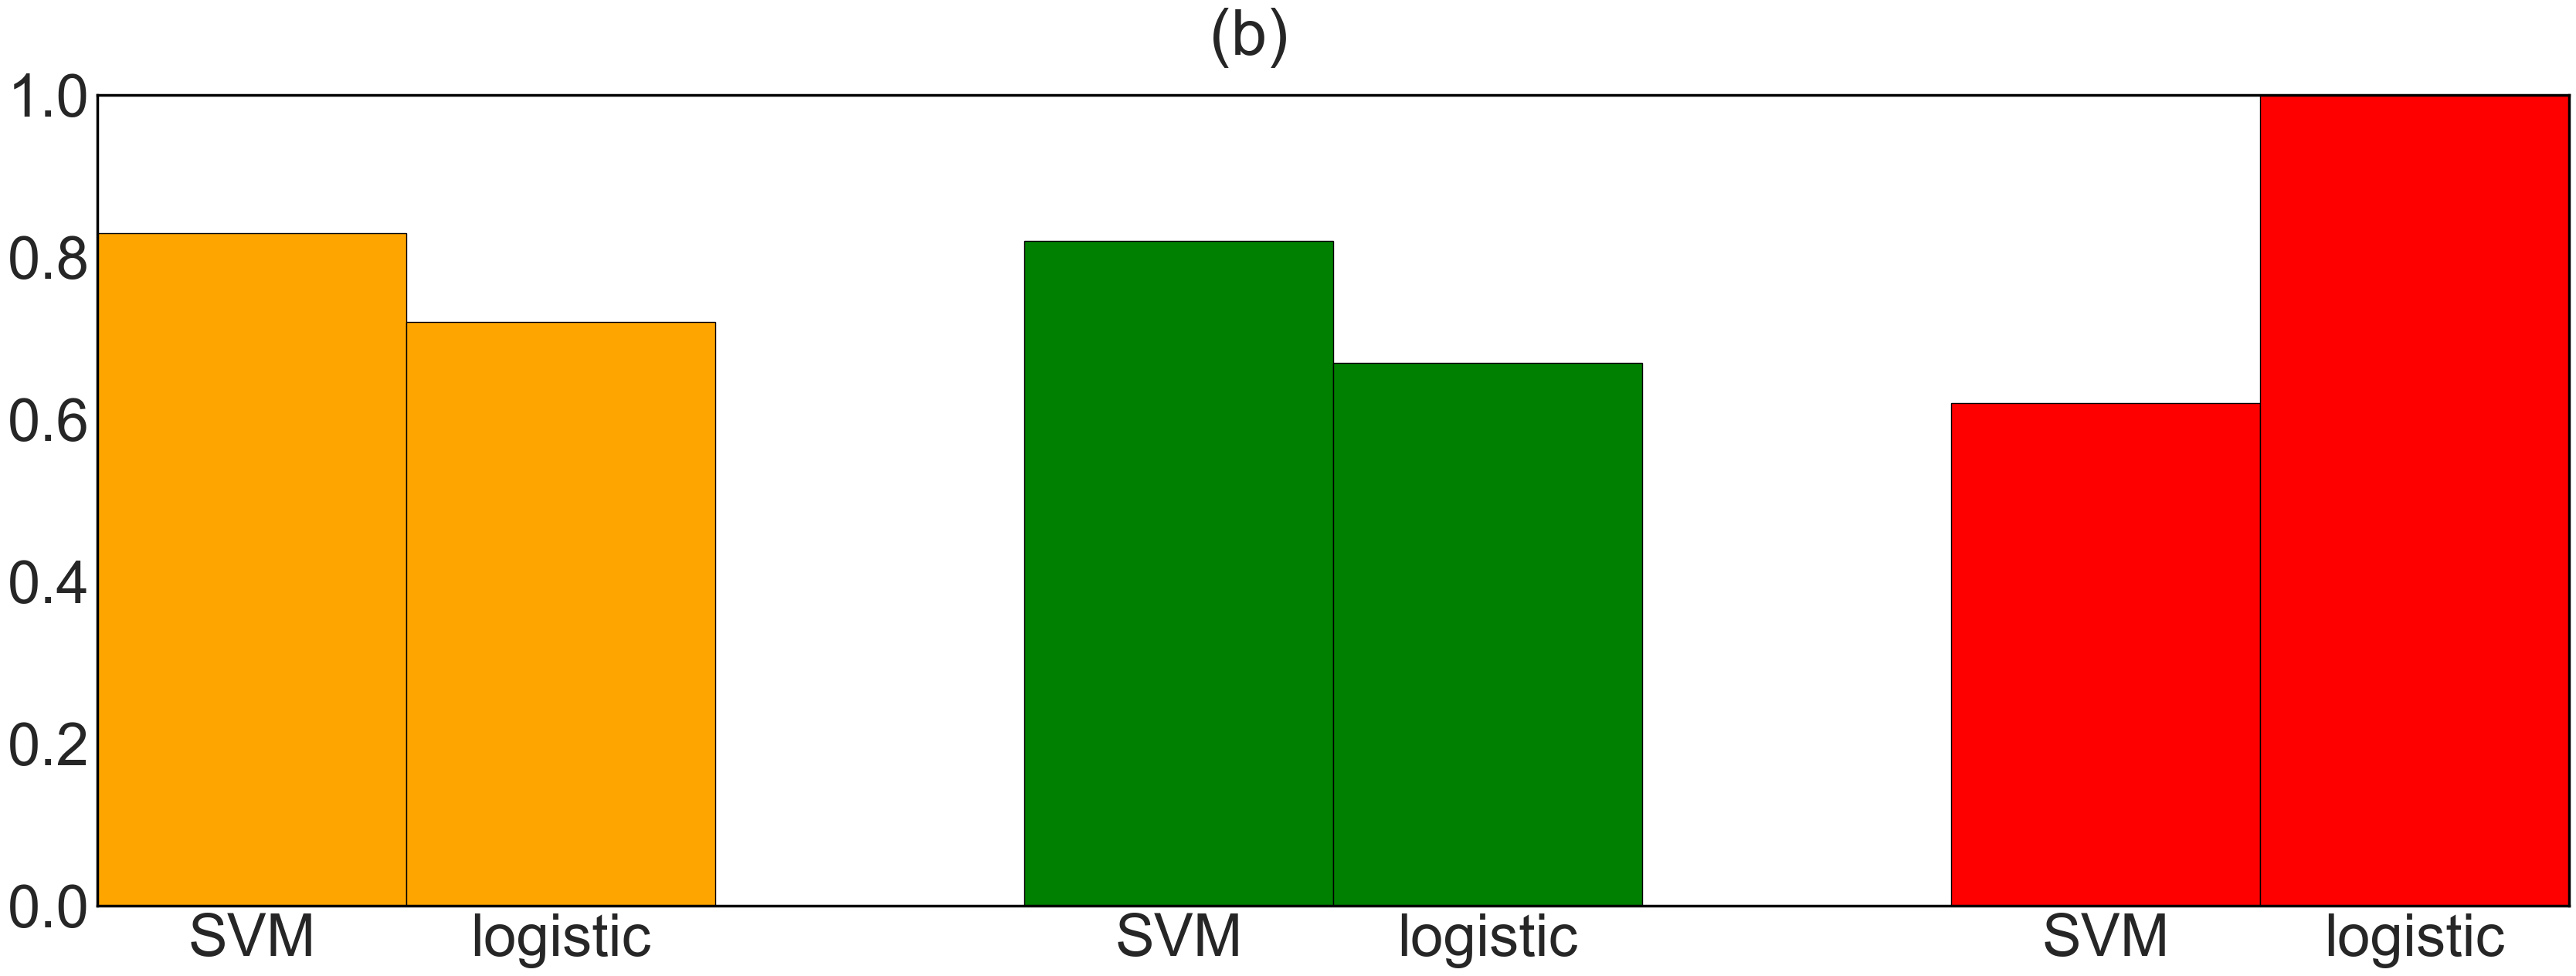

In [32]:

fig = plt.gcf()
fig.set_size_inches(32, 10.5)

#lasso: 
#average logistic regression recall:0.7198317307692308
#average SVM recall:0.8337740384615385

#SVM
#average logistic regression recall:0.6741586538461539
#average SVM recall:0.8233173076923077

#all
#average logistic regression recall:1.0
#average SVM recall:0.6176682692307692

Ydata = [0.83,0.72]
Ydata2 = [0.82,0.67]
Ydata3 = [0.62,1.0]

#br1 = np.array([1,2])
#br2 = np.array([5,6])
#br3 = np.array([9,10])

br1 = np.array([0.5,1])
br2 = np.array([2,2.5])
br3 = np.array([3.5,4])

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

#barWidth = 1
barWidth = 0.5

plt.bar(br1, Ydata, width = barWidth, edgecolor = 'black', color = 'orange')
plt.yticks(fontsize=45)
plt.bar(br2, Ydata2, width = barWidth, edgecolor = 'black', color = 'green')
plt.bar(br3, Ydata3, width = barWidth, edgecolor = 'black', color = 'red')

#plt.xticks([1,2,5,6,9,10],
#        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 45)
plt.xticks([0.5,1,2,2.5,3.5,4],
        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 55)
plt.yticks(fontsize=55)

plt.ylim([0,1])
#abline(0,0.5)
plt.grid(False)

#plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.figtext(0.45,1.05,'(b)',size=60)

Blue0 = mpatches.Patch(color='orange', label='selected features using LASSO')
Green0 = mpatches.Patch(color='green', label='selected features using SVM')
Red0 = mpatches.Patch(color='red', label='all features')
#plt.legend(handles=[Blue0,Green0,Red0], loc='upper center', frameon=False, fontsize = 40)

plt.savefig("AB_bar_plot_recall.pdf", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

In [ ]:
#all
average logistic regression matthews_corrcoef:1.0
average SVM matthews_corrcoef:0.41108312214669185

# svm

average logistic regression matthews_corrcoef:0.4332730548878826
average SVM matthews_corrcoef:0.6674231365245497

# lasso
average logistic regression matthews_corrcoef:0.5565754358568521
average SVM matthews_corrcoef:0.7508996674095748

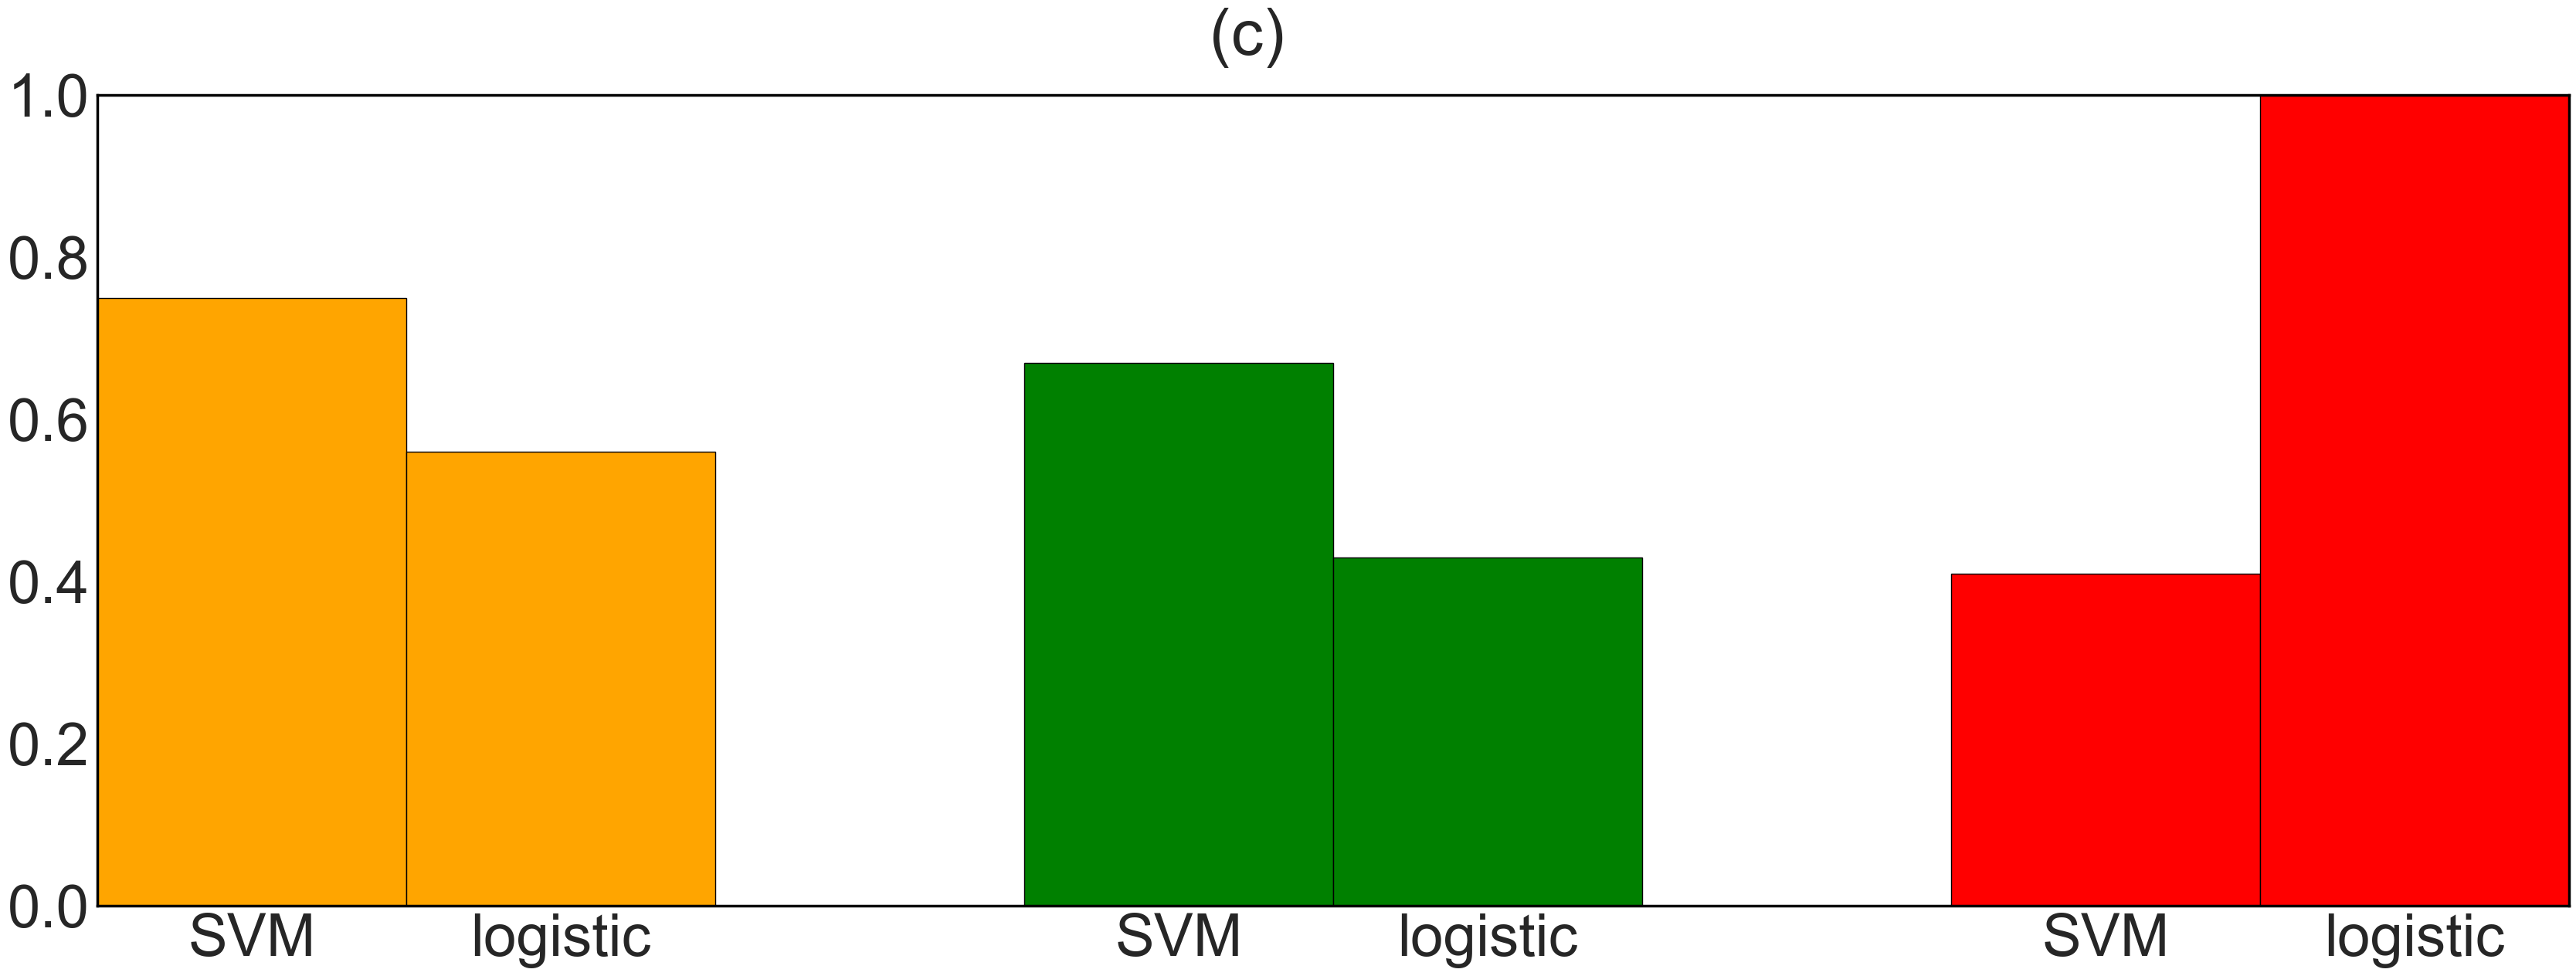

In [34]:

fig = plt.gcf()
fig.set_size_inches(32, 10.5)

Ydata = [0.75,0.56] # lasso 
Ydata2 = [0.67,0.43] # svm
Ydata3 = [0.41,1.0] # all

br1 = np.array([0.5,1])
br2 = np.array([2,2.5])
br3 = np.array([3.5,4])

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50

#barWidth = 1
barWidth = 0.5

plt.bar(br1, Ydata, width = barWidth, edgecolor = 'black', color = 'orange')
plt.yticks(fontsize=45)
plt.bar(br2, Ydata2, width = barWidth, edgecolor = 'black', color = 'green')
plt.bar(br3, Ydata3, width = barWidth, edgecolor = 'black', color = 'red')

#plt.xticks([1,2,5,6,9,10],
#        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 45)
plt.xticks([0.5,1,2,2.5,3.5,4],
        ['SVM', 'logistic','SVM','logistic','SVM','logistic'], fontsize = 55)
plt.yticks(fontsize=55)

plt.ylim([0,1])
#abline(0,0.5)
plt.grid(False)

#plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
#plt.gca().xaxis.set_major_locator(plt.NullLocator())
#plt.gca().yaxis.set_major_locator(plt.NullLocator())

plt.figtext(0.45,1.05,'(c)',size=60)

Blue0 = mpatches.Patch(color='orange', label='selected features using LASSO')
Green0 = mpatches.Patch(color='green', label='selected features using SVM')
Red0 = mpatches.Patch(color='red', label='all features')
#plt.legend(handles=[Blue0,Green0,Red0], loc='upper center', frameon=False, fontsize = 40)

plt.savefig("AB_bar_plot_mcc.pdf", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()